In [1]:
import torch.nn as nn
from torchvision import models
import numpy as np
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import cv2
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset

In [2]:
from ex import *

In [3]:
test_size = 0.3
val_size = 0.3

In [4]:
data = datasets.load_wine()
x_train, x_test, y_train, y_test \
        = train_test_split(data.data, data.target, test_size=test_size, random_state=1)

In [5]:
x_train, x_val, y_train, y_val \
        = train_test_split(x_train, y_train, test_size=val_size, random_state=1)

In [6]:
device="cpu"
batch_size = 50
kwargs = {} if device=='cpu' else {'num_workers': 2, 'pin_memory': True}
loader_kwargs = {'batch_size':batch_size, **kwargs}

In [7]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

In [15]:
# Build Dataset
train_data = CustomTensorDataset(data=(x_train, y_train), 
                                 transform=transform,
                                dataset="wine",n_columns=2)
val_data   = CustomTensorDataset(data=(x_val, y_val), 
                                 transform=transform,
                                 dataset="wine",n_columns=2
                                )
test_data  = CustomTensorDataset(data=(x_test, y_test), 
                                 transform=transform,
                                 dataset="wine",n_columns=2
                                )

In [16]:
train_loader = DataLoader(train_data, shuffle=False, **loader_kwargs)
val_loader   = DataLoader(val_data, shuffle=True, **loader_kwargs)
test_loader  = DataLoader(test_data, shuffle=False, **loader_kwargs)

In [17]:
x , y = next(iter(train_loader))

In [18]:
y

tensor([2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1,
        0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0,
        1, 0])

In [19]:
x.shape

torch.Size([50, 3, 256, 256])

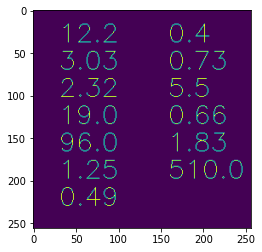

In [20]:
plt.imshow(x[0,1,:])

In [21]:
x_train[0,:]

array([1.22e+01, 3.03e+00, 2.32e+00, 1.90e+01, 9.60e+01, 1.25e+00,
       4.90e-01, 4.00e-01, 7.30e-01, 5.50e+00, 6.60e-01, 1.83e+00,
       5.10e+02])

In [29]:
model = load_model("densenet121",3)    

In [30]:
opt='Adagrad'

In [31]:
optimizer = opt_selection(model, opt)

In [32]:
criterion = nn.CrossEntropyLoss()

In [33]:
best_train, best_val = 0.0, 0.0
epochs = 100

In [ ]:
import copy
for epoch in range(1, epochs+1):
    # Train and Validate
    train_stats = train_step(model, criterion, optimizer, train_loader,"classification")
    valid_stats = valid_step(model, criterion, val_loader,"classification")
    print("train", train_stats)
    print("valid", valid_stats)
    # Keep best model
    if valid_stats['metric'] > best_val or (valid_stats['metric']==best_val and train_stats['accuracy']>=best_train):
        best_train  = train_stats['metric']
        best_val    = valid_stats['metric']
        best_model_weights = copy.deepcopy(model.state_dict())

# Load best model and evaluate on test set
model.load_state_dict(best_model_weights)
test_stats = valid_step(model, criterion, test_loader)

print('\nBests Model Accuracies: Train: {:4.2f} | Val: {:4.2f} | Test: {:4.2f}'.format(best_train, best_val, test_stats['accuracy']))

train {'loss': 0.3524945601820946, 'metric': 0.8953488372093024}
valid {'loss': 18.0, 'metric': 0.47368421052631576}
